<a href="https://colab.research.google.com/github/Nayeem1028/Simulation-and-Modeling-Lab/blob/main/SIM_Lab_Assignment_06_2215151028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student ID: 2215151028

# Monte Carlo Simulation: Inventory Management (LatinOrg Inc.)



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
import random

# Data for inventory and probabilities
stock_levels = [15, 25, 35, 40, 42, 55]
stock_probs = [0.12, 0.25, 0.35, 0.20, 0.06, 0.02]

# Parameters
simulation_duration = 60         # total weeks to simulate
order_frequency = 2              # orders placed every 2 weeks
number_of_orders = simulation_duration // order_frequency

# Cost parameters
cost_per_order = 50              # fixed ordering cost ($)
cost_per_unit = 4                # cost per product ordered ($)
weekly_holding_cost = 1          # holding cost per unit per week ($)
max_stock = 100                  # maximum stock allowed

order_quantities = []
cost_records = []

for _ in range(number_of_orders):
    # Sample current inventory level at ordering time
    current_stock = random.choices(stock_levels, stock_probs)[0]

    # Calculate quantity to order to restock up to max_stock
    quantity_ordered = max_stock - current_stock

    # Calculate costs
    ordering_expense = cost_per_order + quantity_ordered * cost_per_unit

    # Inventory is held for 'order_frequency' weeks before next order arrives
    inventory_holding_expense = current_stock * weekly_holding_cost * order_frequency

    # Total expense for this ordering cycle
    total_expense = ordering_expense + inventory_holding_expense

    # Collect data
    order_quantities.append(quantity_ordered)
    cost_records.append(total_expense)

# Compute averages over the simulation period
average_order_quantity = sum(order_quantities) / number_of_orders
average_cycle_cost = sum(cost_records) / number_of_orders

print(f"(a) Average order quantity over {simulation_duration} weeks (order every {order_frequency} weeks): {average_order_quantity:.2f} units")
print(f"(b) Average total cost per ordering cycle: ${average_cycle_cost:.2f}")


(a) Average order quantity over 60 weeks (order every 2 weeks): 66.77 units
(b) Average total cost per ordering cycle: $383.53


## Part 2: Single-Server Queue Simulations
### **Simulation 1:** Perform a simulation for 200 customers with λ=3and μ=4. Calculate and compare the waiting time and server utilization.

In [18]:
import numpy as np

# Step 1: Parameters
lambda_rate = 3    # arrival rate λ = 3
mu_rate = 4        # service rate μ = 4
n_customers = 200  # number of customers

# Step 2: Generate inter-arrival and service times
inter_arrival_times = np.random.exponential(1 / lambda_rate, n_customers)
service_times = np.random.exponential(1 / mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

# Step 3: Initialize start and end times
start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)

start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i - 1])
    end_times[i] = start_times[i] + service_times[i]

# Step 4: Calculate performance metrics
waiting_times = start_times - arrival_times
server_utilization = np.sum(service_times) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)

print(f"Simulation for {n_customers} customers with λ = {lambda_rate} and μ = {mu_rate}:")
print(f"Average Waiting Time: {avg_waiting_time:.2f} time units")
print(f"Server Utilization: {server_utilization * 100:.2f}%")


Simulation for 200 customers with λ = 3 and μ = 4:
Average Waiting Time: 1.19 time units
Server Utilization: 88.02%


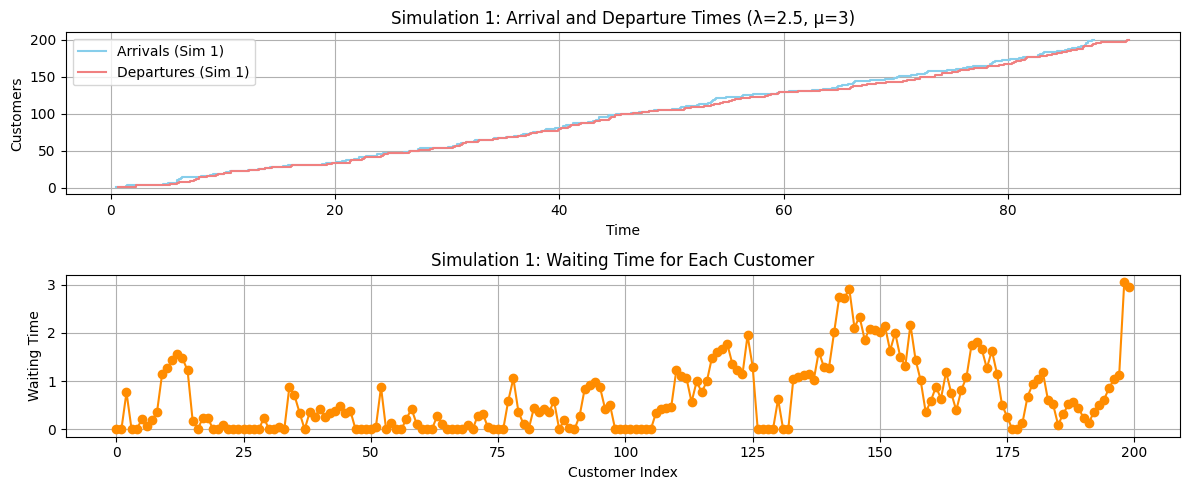

In [23]:


plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals (Sim 1)', where='post', color='skyblue')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures (Sim 1)', where='post', color='lightcoral')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title(f'Simulation 1: Arrival and Departure Times (λ={lambda_rate}, μ={mu_rate})') # Include rates in title

plt.subplot(2,1,2)
plt.plot(range(n_customers), waiting_times, 'o-', label='Waiting Time (Sim 1)', color='darkorange')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Simulation 1: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()

### **Simulation 2:**Simulate a system with λ=8 and μ=6. Discuss the impact of server overload on system performance.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Scenario 2 - overload
lambda_rate = 8   # arrival rate (λ = 8)
mu_rate = 6       # service rate (μ = 6)
n_customers = 200 # number of customers to simulate

# Generate inter-arrival and service times
inter_arrival_times = np.random.exponential(1 / lambda_rate, n_customers)
service_times = np.random.exponential(1 / mu_rate, n_customers)
arrival_times = np.cumsum(inter_arrival_times)

# Initialize start and end service times arrays
start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)

# First customer starts service upon arrival
start_times[0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

# Simulate service start and end times for all customers
for i in range(1, n_customers):
    start_times[i] = max(arrival_times[i], end_times[i - 1])
    end_times[i] = start_times[i] + service_times[i]

# Calculate waiting times and server utilization
waiting_times = start_times - arrival_times
avg_waiting_time = np.mean(waiting_times)
server_utilization = np.sum(service_times) / end_times[-1]

print(f"Scenario 2 (λ = {lambda_rate}, μ = {mu_rate} - Overload):")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Server Utilization: {server_utilization * 100:.2f}%")




Scenario 2 (λ = 8, μ = 6 - Overload):
Average Waiting Time: 4.69 units
Server Utilization: 99.43%


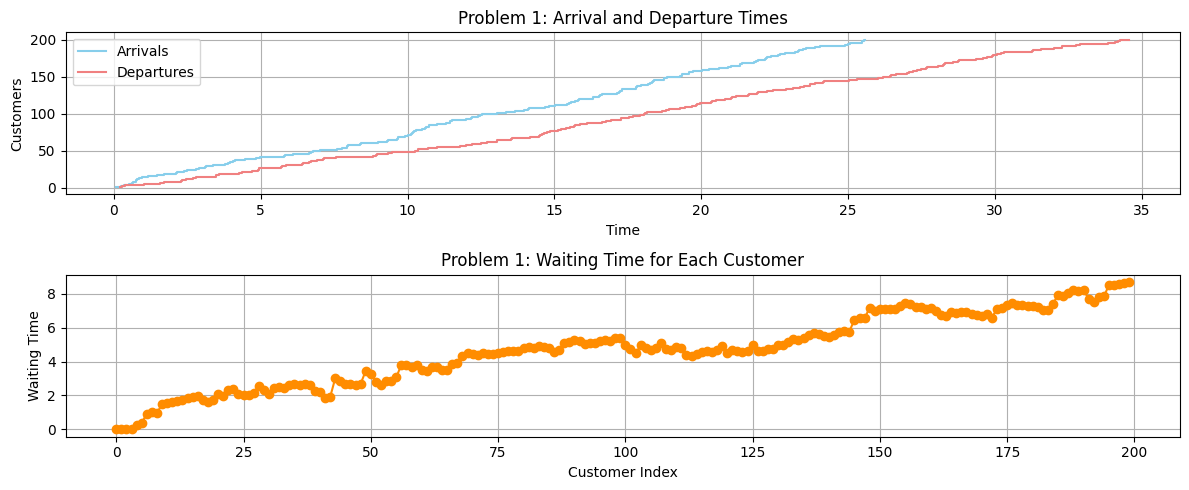

In [20]:
# Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
# Modified colors: 'skyblue' for Arrivals, 'lightcoral' for Departures
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post', color='skyblue')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post', color='lightcoral')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 1: Arrival and Departure Times')

plt.subplot(2,1,2)
# Modified color: 'darkorange' for Waiting Time
plt.plot(range(n_customers), waiting_times, 'o-', label='Waiting Time', color='darkorange')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 1: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()

### **Simulation 3:** Modify the program to include a limited queue capacity (e.g., maximum 10 customers).Analyze how this affects the performance metrics.

In [21]:
import numpy as np

# Parameters
max_queue_length = 10
lambda_rate = 2.5
mu_rate = 3
n_customers = 200

# Generate arrivals and service times
arrivals = np.random.exponential(1 / lambda_rate, n_customers)
services = np.random.exponential(1 / mu_rate, n_customers)
arrival_times = np.cumsum(arrivals)

# Initialize
start_times = []
end_times = []
queue = []  # to track customers currently in queue (their end times)
served_customers = 0

for i in range(n_customers):
    arrival = arrival_times[i]

    # Remove customers from queue who have finished before this arrival
    queue = [finish_time for finish_time in queue if finish_time > arrival]

    # Check queue capacity
    if len(queue) >= max_queue_length:
        # Queue full, customer leaves (rejected)
        continue

    # Customer can be served
    if len(queue) == 0:
        # Server idle, start immediately at arrival
        start = arrival
    else:
        # Server busy, start after last customer finishes
        start = queue[-1]

    end = start + services[i]
    start_times.append(start)
    end_times.append(end)
    queue.append(end)  # add this customer's end time to queue
    served_customers += 1

start_times = np.array(start_times)
end_times = np.array(end_times)
waiting_times = start_times - arrival_times[:served_customers]
server_utilization = np.sum(services[:served_customers]) / end_times[-1]
avg_waiting_time = np.mean(waiting_times)

print(f"Scenario 3 (Limited Queue = {max_queue_length}):")
print(f"Customers Served: {served_customers}")
print(f"Average Waiting Time: {avg_waiting_time:.2f} units")
print(f"Server Utilization: {server_utilization * 100:.2f}%")

#ploting


Scenario 3 (Limited Queue = 10):
Customers Served: 200
Average Waiting Time: 0.66 units
Server Utilization: 71.01%


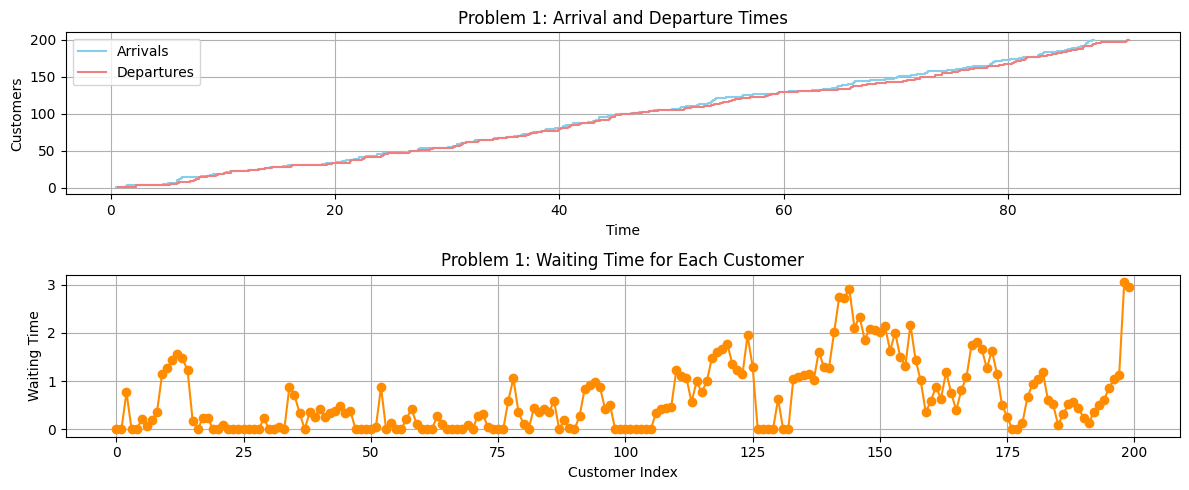

In [22]:
# Plot
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
# You might want to specify colors like in previous examples
plt.step(arrival_times, np.arange(1, n_customers+1), label='Arrivals', where='post', color='skyblue')
plt.step(end_times, np.arange(1, n_customers+1), label='Departures', where='post', color='lightcoral')
plt.xlabel('Time')
plt.ylabel('Customers')
plt.legend()
plt.grid(True)
plt.title('Problem 1: Arrival and Departure Times')

plt.subplot(2,1,2)
# You might want to specify a single color and style
plt.plot(range(n_customers), waiting_times, 'o-', label='Waiting Time', color='darkorange')
plt.xlabel('Customer Index')
plt.ylabel('Waiting Time')
plt.grid(True)
plt.title('Problem 1: Waiting Time for Each Customer')
plt.tight_layout()
plt.show()